<a href="https://colab.research.google.com/github/Sharan1102/Data_Science_Projects-/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics  import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/aishuej/dataset/main/car_data.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
df["Engine HP"].fillna(df["Engine HP"].median(),inplace=True)
df["Engine Cylinders"].fillna(df["Engine Cylinders"].median(),inplace=True)
df["Number of Doors"].fillna(df["Number of Doors"].median(),inplace=True)
df["Engine Fuel Type"].fillna(df["Engine Fuel Type"].mode().iloc[0],inplace=True)
df["Market Category"].fillna(df["Market Category"].mode().iloc[0],inplace=True)
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [ ]:
df.drop_duplicates()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
from sklearn import preprocessing
# loop over each col in the df where dtype is 'obj'
for col in df.select_dtypes(include=["object"]).columns:
# Initialize LabelEncoder object
 lable_encoder = preprocessing.LabelEncoder()
# Fit the encoder to the unique values in the col
 lable_encoder.fit(df[col].unique())
# Transform the col using the encoders
 df[col] = lable_encoder.transform(df[col])
# Print the col name and }") the unique encoded values
 print(f"{col}:{df[col].unique()}")

Make:[ 4  3 12 31 10 33 47 29 32 13  1 45 30 28 36 37 39 15 19 35 18 34 43 14
  8 21  5  9 11 22 25 42 46 41  7  0 38 27 24  2 23 26 20 40 16 17 44  6]
Model:[  1   0   2   3   4   6   7   8  10   9   5  13  12  15  16  14  17  18
  19  20  21  22  23  11  25  24  26  27  28  29  30  31  34  33  36  39
  35  37  38  40  41  43  44  42  45  32  48  47  49  50  51  53  52  54
  55  46  56  57  58  59  60  61  62  63  64  65  67  66  68  69  70  73
  72  71  74  75  76  77  78  79  80  81  83  82  84  85  86  87  95  94
  96  97  99 100 101  98 102 103 104 105 106 107 108 109 904 903  88  89
 110 112 111 113  90 114 115 116 117 119 118  92  93  91 120 121 123 122
 124 125 126 127 128 129 130 132 131 133 135 136 134 137 139 141 140 142
 143 144 145 146 147 148 149 150 151 153 152 154 155 138 156 157 160 161
 162 163 164 186 185 187 188 190 189 191 193 194 192 195 196 197 198 199
 200 201 202 203 205 204 165 206 207 208 209 210 211 212 213 214 216 217
 215 158 159 167 168 166 218 169 170 21

In [ ]:
# the codes before label encoding
x= df.drop("MSRP", axis=1)
y = df["MSRP"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
clr=DecisionTreeRegressor()

clr.fit(x_train,y_train)

y_pred=clr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

R-squared: 0.8456341676036462


#next data set

In [ ]:
df1 = pd.read_csv("/content/HeartDisease.csv")
df1

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df1.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [ ]:
df1.drop_duplicates()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


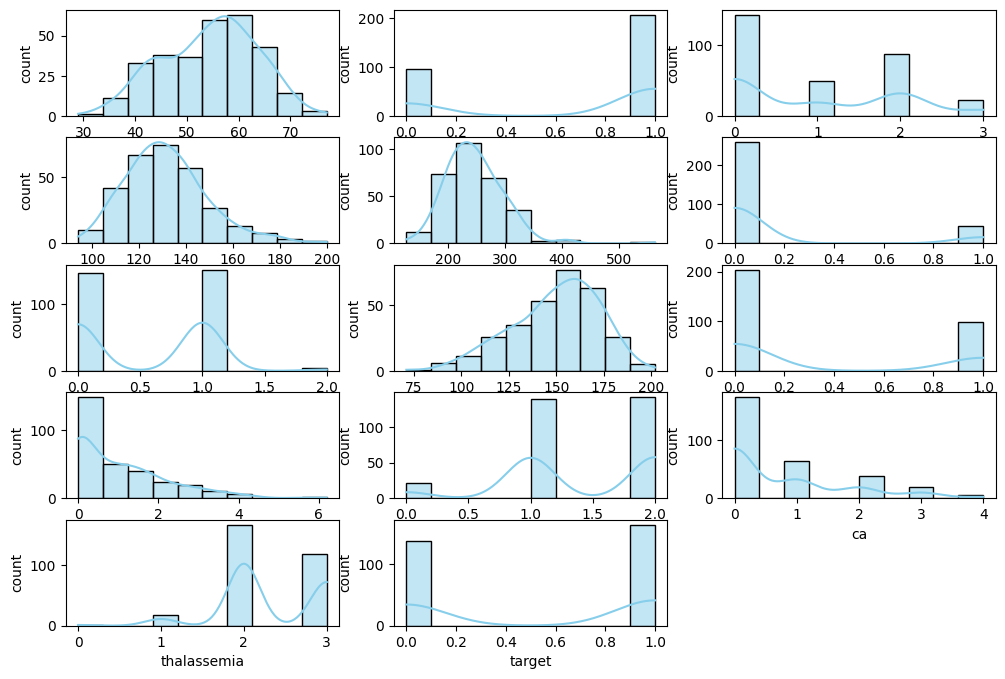

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df1

plt.figure(figsize=(12,8))
for i,col in enumerate(numerical_cols,1):
  plt.subplot(5,3,i)
  sns.histplot(data=df1,x=col,kde=True,bins=10,color="skyblue")
  plt.xlabel(col)
  plt.ylabel("count")


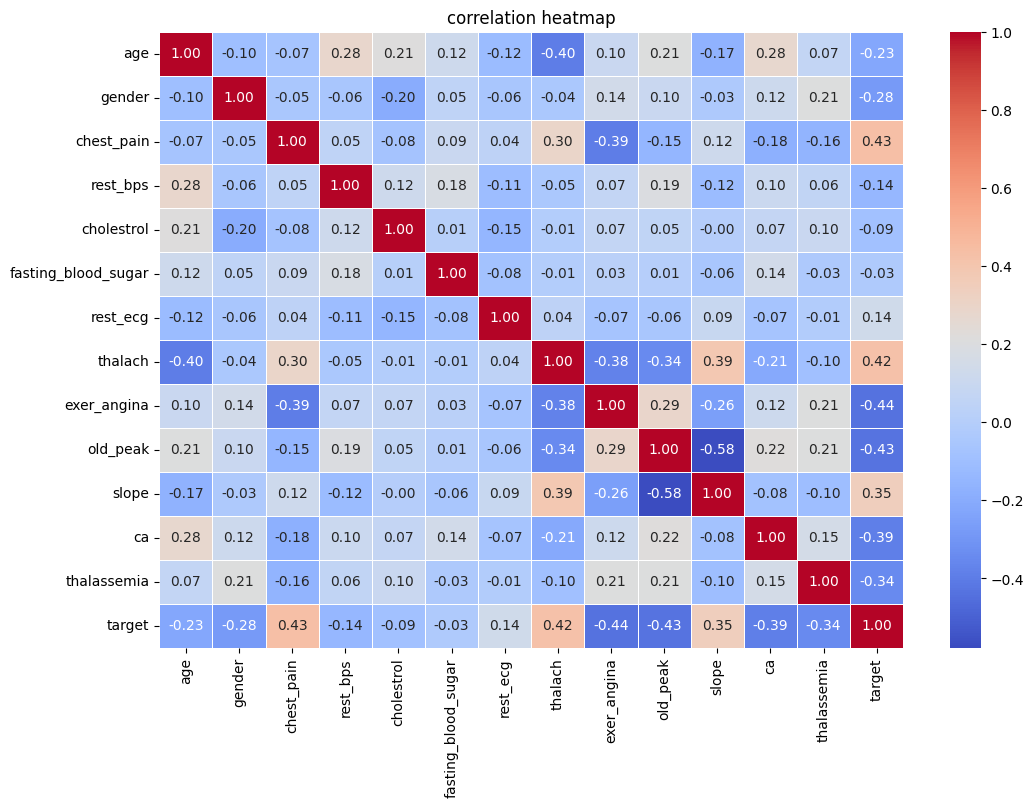

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("correlation heatmap")
plt.show()

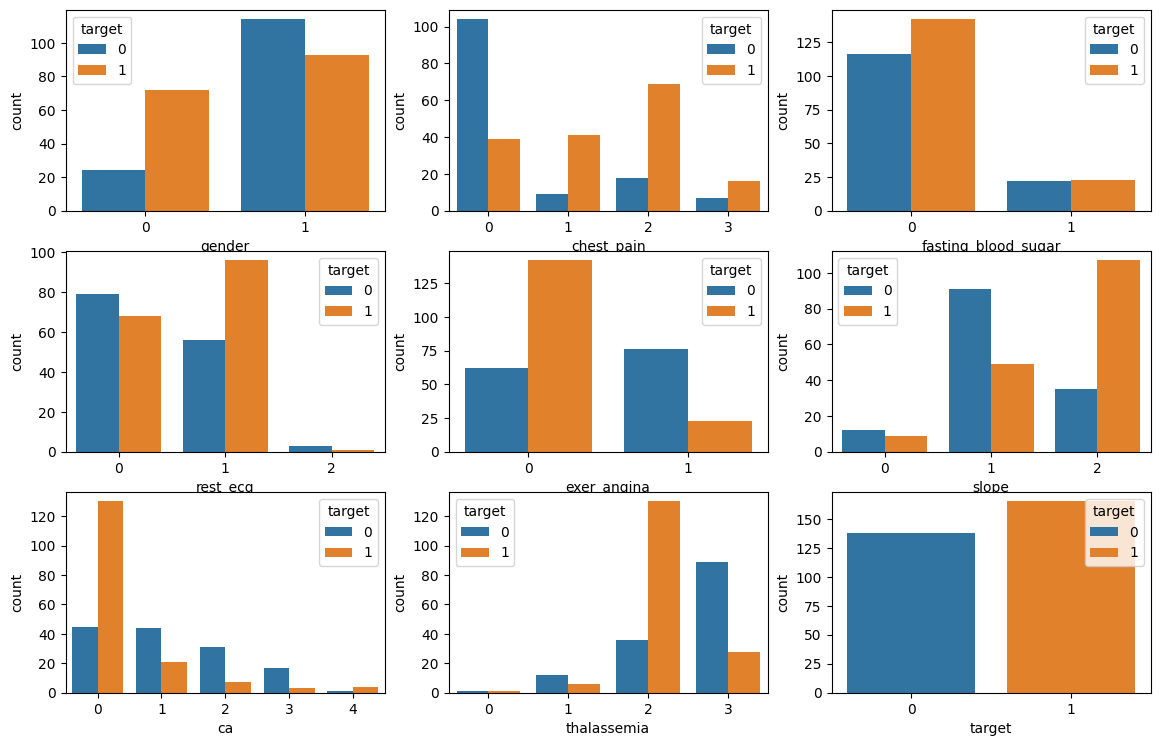

In [ ]:
numerical_cols=["gender", "chest_pain","fasting_blood_sugar", "rest_ecg", "exer_angina", "slope", "ca","thalassemia","target"]
plt.figure(figsize=(14,12))
for i,col in enumerate(numerical_cols,1):
  plt.subplot(4,3,i)
  sns.countplot(data=df1,x=col,hue='target')#kurnel distributed
  plt.xlabel(col)
  plt.ylabel('count')
plt.show()

In [ ]:
# the codes before label encoding
x= df1.drop("target", axis=1)
y = df1["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
clf=DecisionTreeClassifier()

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification=classification_report(y_test,y_pred)
print("accuracy:",accuracy)
print("conf_matrix:",conf_matrix)
print("classification:",classification)
print("classification",classification)

accuracy: 0.8524590163934426
conf_matrix: [[27  2]
 [ 7 25]]
classification:               precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

classification               precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [ ]:
#step  6 : Featiure Importance
feature_importance=clf.feature_importances_
feature_importance_df=pd.DataFrame({'Feature': x.columns,'Importance': feature_importance})
feature_importance_df=feature_importance_df.sort_values('Importance',ascending=True)
print(feature_importance_df)

                Feature  Importance
5   fasting_blood_sugar    0.000000
6              rest_ecg    0.016097
12          thalassemia    0.025328
1                gender    0.034880
7               thalach    0.046373
10                slope    0.051184
3              rest_bps    0.073018
8           exer_angina    0.075421
9              old_peak    0.092402
0                   age    0.109517
4            cholestrol    0.117435
11                   ca    0.133084
2            chest_pain    0.225263


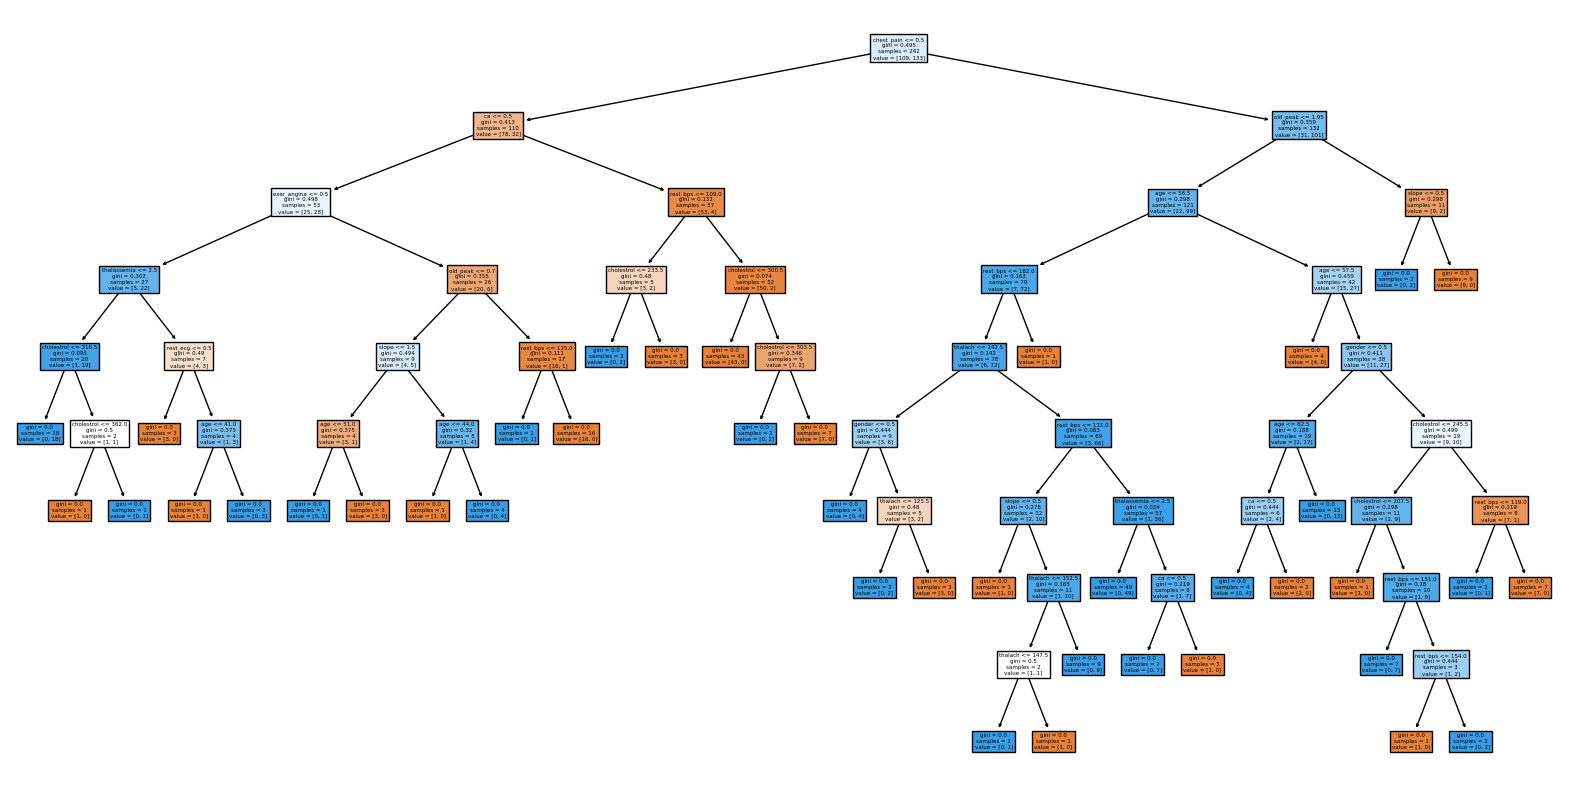

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt


#Assuming "model" is your trained Decision Tree Classifier
plt.figure(figsize=(20,10))
plot_tree(clf,filled=True,feature_names=x.columns)
plt.show()

Grid

In [ ]:
from sklearn.model_selection import GridSearchCV

#training model decision tree

param_grid= {
    'criterion':['gini','entropy'],
    'max_depth':[10,20,30,40,50],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=84),param_grid,cv=5)
grid_search.fit(x_train,y_train)
# Best parameters  found
print("Best parameters:" , grid_search.best_params_)
#step 5 : Making Predications
best_model = grid_search.best_estimator_
predictions=best_model.predict(x_test)

#evaluating the model

accuracy=accuracy_score(y_test,predictions)
conf_matrix=confusion_matrix(y_test,predictions)
class_report=classification_report(y_test,predictions)

print("Accuracy Score: ",accuracy)
print("confusion matrix: ",conf_matrix)
print("class report: ",class_report)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy Score:  0.8524590163934426
confusion matrix:  [[28  1]
 [ 8 24]]
class report:                precision    recall  f1-score   support

           0       0.78      0.97      0.86        29
           1       0.96      0.75      0.84        32

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



In [ ]:
#creat logistics regrestion model
model=LogisticRegression()

#train the model on train set
model.fit(x_train,y_train)

#make prediction on the testing  set
y_pred=model.predict(x_test)

#evalute the model
accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification=classification_report(y_test,y_pred)
print("accuracy:",accuracy)
print("conf_matrix:",conf_matrix)
print("classification:",classification)
print("classification",classification)

accuracy: 0.8852459016393442
conf_matrix: [[25  4]
 [ 3 29]]
classification:               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

classification               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
x= df.drop("MSRP", axis=1)
y = df["MSRP"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

clr=RandomForestRegressor()

clr.fit(x_train,y_train)

y_pred=clr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

R-squared: 0.9768853544625209


In [ ]:
x= df1.drop("target", axis=1)
y = df1["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification=classification_report(y_test,y_pred)
print("accuracy:",accuracy)
print("conf_matrix:",conf_matrix)
print("classification:",classification)
print("classification",classification)

accuracy: 0.8524590163934426
conf_matrix: [[24  5]
 [ 4 28]]
classification:               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

classification               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

